# **TF2 & Keras (Sequential API)**

Sequential API : https://www.tensorflow.org/guide/keras/sequential_model

In [1]:
# Necessary imports for building NN

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

print(tf.__version__)


2.15.0


In [2]:
#load mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3


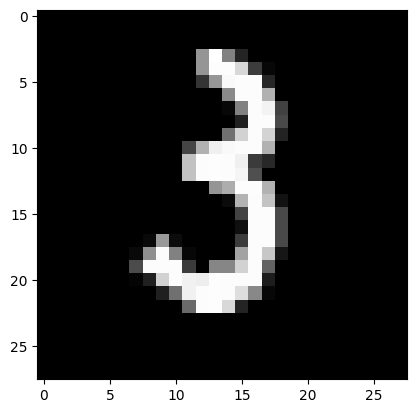

In [4]:
idx = 1234
plt.imshow(X_train[idx], cmap='gray')
print(y_train[idx])

In [5]:
#Applying OHE
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

# Taking seperatly the classes
y_train = y_train_OHE.shape[1]
y_test = y_test_OHE[1]

#Printing the shape
num_labels = y_train
print(y_train)

10


In [6]:
# 2D matrix into 1D matrix
Image_size = X_train.shape[1]
Input_shape = Image_size * Image_size

# 2D to 1D + Normalize (0-255)
X_train = np.reshape(X_train, [-1, Input_shape])
X_train = X_train.astype('float32') / 255

X_test = np.reshape(X_test, [-1, Input_shape])
X_test = X_test.astype('float32') / 255

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# Hyper - params for NN
batch_size = 128 # typically 2^n
hidden_units = 256

In [9]:
# sequential API
model = Sequential()
model.add(Dense(hidden_units, input_dim=Input_shape))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322

In [10]:
%%time

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(X_train, y_train_OHE, epochs=10, batch_size=batch_size)

Epoch 1/10


469/469 [==============================] - 3s 5ms/step - loss: 0.2600 - accuracy: 0.9250
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0960 - accuracy: 0.9709
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0625 - accuracy: 0.9805
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0203 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.99

In [11]:
loss, acc = model.evaluate(
    X_test,
    y_test_OHE,
    batch_size = batch_size,
    verbose = 0
)

print('Test Accuracy : ', (100.0 * acc))
print('Loss :', loss)

Test Accuracy :  98.1000006198883
Loss : 0.08420984447002411


# **TF2 & Keras (Functional API)**   

Functional API : https://www.tensorflow.org/guide/keras/functional_api


In [12]:
print(X_train.shape)

(60000, 784)


In [13]:
input = keras.Input(shape=(784,))
input.shape

TensorShape([None, 784])

In [14]:
x1 = layers.Dense(hidden_units, activation='relu')(input)
x2 = layers.Dense(hidden_units, activation='relu')(x1)
output = layers.Dense(num_labels, activation='softmax')(x2)

model = keras.Model(inputs=input, outputs=output, name="Functial_API")
model.summary()

Model: "Functial_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(

    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']

)

model.fit(X_train, y_train_OHE, epochs=5, batch_size=batch_size)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2583 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0972 - accuracy: 0.9707
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0629 - accuracy: 0.9805
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0472 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0327 - accuracy: 0.9897


In [16]:
loss, acc = model.evaluate(

    X_test,
    y_test_OHE,
    batch_size=batch_size,
    verbose=0   #amount of information displayed during the evaluation process. 

)

print('Test Accuracy : ', (100.0 * acc))
print('Loss :', loss)

Test Accuracy :  97.69999980926514
Loss : 0.07489731162786484


# **Dropout: Regularization through randomization**

* Dropout: https://keras.io/api/layers/regularization_layers/dropout/
* Layer weight regularizers : https://keras.io/api/layers/regularizers/

In [17]:
x1 = layers.Dense(hidden_units, activation='relu')(input)
x2 = layers.Dropout(0.3)(x1)
x3 = layers.Dense(hidden_units, activation='relu')(x2)
x4 = layers.Dropout(0.3)(x3)
output = layers.Dense(num_labels, activation='softmax')(x4)

model = keras.Model(inputs=input, outputs=output, name="Functial_API")
model.summary()

Model: "Functial_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 26932

In [18]:
model.compile(

    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']

)

model.fit(X_train, y_train_OHE, epochs=3, batch_size=batch_size)

Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 0.3503 - accuracy: 0.8946
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1520 - accuracy: 0.9541
Epoch 3/3
469/469 [==============================] - 2s 5ms/step - loss: 0.1149 - accuracy: 0.9649


In [19]:
loss, acc = model.evaluate(

    X_test,
    y_test_OHE,
    batch_size=batch_size,
    verbose=0   #amount of information displayed during the evaluation process. 

)

print('Test Accuracy : ', (100.0 * acc))
print('Loss :', loss)

Test Accuracy :  97.07000255584717
Loss : 0.08796355128288269


# **Tensorboard and Computational Graph**

Tensorboard : https://www.tensorflow.org/tensorboard/graphs

In [30]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#what is callback
model.fit(
    X_train, 
    y_train_OHE, 
    epochs=5, 
    batch_size=batch_size,
    callbacks=[tensorboard_callback]
    )

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0233 - accuracy: 0.9921
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9924
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0189 - accuracy: 0.9937


In [31]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 19172), started 0:33:41 ago. (Use '!kill 19172' to kill it.)

# **BatchNormalization**

BatchNormalization layer : https://keras.io/api/layers/normalization_layers/batch_normalization/

In [36]:
from tensorflow.keras.layers import BatchNormalization

x1 = layers.Dense(256, activation='relu')(input)
x1 = layers.Dropout(0.1)(x1)
x1 = BatchNormalization()(x1)

x2 = layers.Dense(256, activation='relu')(x1)
x2 = layers.Dropout(0.1)(x2)
x2 = BatchNormalization()(x2)

x3 = layers.Dense(256, activation='relu')(x2)
x3 = layers.Dropout(0.1)(x3)
x3 = BatchNormalization()(x3)

x4 = layers.Dense(256, activation='relu')(x3)
x4 = layers.Dropout(0.1)(x4)
output = layers.Dense(num_labels, activation='softmax')(x4)

model = keras.Model(inputs = input, outputs = output, name="simple_model")
model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                      

In [38]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime

model.compile(

    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']

)


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


model.fit(X_train, y_train_OHE, epochs=3, batch_size=batch_size, callbacks=[tensorboard_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/3
469/469 [==============================] - 7s 9ms/step - loss: 0.0863 - accuracy: 0.9730
Epoch 2/3
469/469 [==============================] - 5s 10ms/step - loss: 0.0690 - accuracy: 0.9783
Epoch 3/3
469/469 [==============================] - 4s 10ms/step - loss: 0.0612 - accuracy: 0.9803


In [ ]:
%tensorboard --logdir logs